In [18]:
import numpy as np
import sympy as sp
import math
import cmath
import matplotlib.pyplot as plt

In [19]:
eps = 0.0001

# Define symbols
x, y, t = sp.symbols('x y t')

In [20]:
def euler_method(function, x_start, y_start, t_min, t_max):
    list_x = [x_start]
    list_y = [y_start]
    list_parameter = [t_min]
    h = 0.05
    eps = 0.0001
    parameter = t_min
    plt.plot(x_start, y_start, 'r.')
    num_of_noreal = 0
    num_of_attention = 0
    num_of_iteration = 0

    while parameter <= t_max:
        num_of_iteration += 1       
        # Calculate the gradient
        gradient_x = sp.diff(function, x).subs({x: x_start, y: y_start, t: parameter})
        gradient_y = sp.diff(function, y).subs({x: x_start, y: y_start, t: parameter})

        move_x = gradient_x/math.sqrt(gradient_x**2+gradient_y**2)
        move_y = gradient_y/math.sqrt(gradient_x**2+gradient_y**2)

        if (abs(move_x) < eps and abs(move_y) < eps):
            print('Attention!')
            num_of_attention +=1
        
        #print(f"Gradient at {x_start}, {y_start} and t={parameter}: ({gradient_x},{gradient_y})")
        #print(f"After scaling: ({move_x},{move_y})") 

        x_new = x_start + h * (-move_y)
        y_new = y_start + h * move_x
        #print(f"New point: ({x_new}, {y_new})")
        list_x.append(x_new)
        list_y.append(y_new)
        
        x_start = x_new
        y_start = y_new
        plt.plot(x_new, y_new, 'b.')

        # Solving equation for parameter t
        a = -1
        b = -2*x_new
        c = y_new
        D = b**2 - (4*a*c)
        roots = []

        if (D >= 0):
            sol1 = (-b-cmath.sqrt(D))/(2*a)
            if t_min <= sol1 <= t_max: 
                 roots.append(sol1)
            sol2 = (-b+cmath.sqrt(D))/(2*a)
            if t_min <= sol2 <= t_max: 
                 roots.append(sol2)
            print(f"Algorithm has chosen {sol1} as a root")
            parameter = sol1
        else:
            print("No real solution")
            parameter += 0.001
            num_of_noreal += 1
    print('Počet nulových gradientov: ' + str(num_of_attention))
    print('Počet komplexných koreňov: ' + str(num_of_noreal))
    print('Počet iterácií: ' + str(num_of_iteration))
     

In [21]:
def first_modification_euler_method(function, x_start, y_start, t_min, t_max, h, color, eps):
    list_x = [x_start]
    list_y = [y_start]
    list_parameter = [t_min]
    parameter = t_min
    plt.plot(x_start, y_start, 'r.')
    num_of_noreal = 0
    num_of_attention = 0
    num_of_iteration = 0

    while parameter <= t_max:
        gradient_x = sp.diff(function, x).subs({x: x_start, y: y_start, t: parameter})
        gradient_y = sp.diff(function, y).subs({x: x_start, y: y_start, t: parameter})

        first_move_x = gradient_x / math.sqrt(gradient_x**2 + gradient_y**2)
        first_move_y = gradient_y / math.sqrt(gradient_x**2 + gradient_y**2)

        if abs(first_move_x) < eps and abs(first_move_y) < eps:
            print('Attention!')
            num_of_attention += 1

        k1x = -first_move_y
        k1y = first_move_x

        pomocny_x = x_start + (1.0/2.0)*h*k1x
        pomocny_y = y_start + (1.0/2.0)*h*k1y

        a = -1
        b = -2*pomocny_x
        c = pomocny_y
        D = b**2 - (4*a*c)
        roots = []

        if D >= 0:
            sol1 = (-b - cmath.sqrt(D)) / (2*a)
            if t_min <= sol1 <= t_max:
                roots.append(sol1)
            sol2 = (-b + cmath.sqrt(D)) / (2*a)
            if t_min <= sol2 <= t_max:
                roots.append(sol2)
            #print(f"Algorithm has chosen {sol1} as a root")
            parameter = sol1
        else:
            #print("No real solution")
            parameter += 0.001
            num_of_noreal += 1

        gradient_x = sp.diff(function, x).subs({x: pomocny_x, y: pomocny_y, t: parameter})
        gradient_y = sp.diff(function, y).subs({x: pomocny_x, y: pomocny_y, t: parameter})

        second_move_x = gradient_x / math.sqrt(gradient_x**2 + gradient_y**2)
        second_move_y = gradient_y / math.sqrt(gradient_x**2 + gradient_y**2)

        if abs(second_move_x) < eps and abs(second_move_y) < eps:
            print('Attention!')
            num_of_attention += 1

        k2x = -second_move_y
        k2y = second_move_x

        x_new = x_start + h*k2x
        y_new = y_start + h*k2y

        list_x.append(x_new)
        list_y.append(y_new)

        x_start = x_new
        y_start = y_new
        plt.plot(x_new, y_new, color)

        a = -1
        b = -2*x_new
        c = y_new
        D = b**2 - (4*a*c)
        roots = []

        if D >= 0:
            sol1 = (-b - cmath.sqrt(D)) / (2*a)
            if t_min <= sol1 <= t_max:
                roots.append(sol1)
            sol2 = (-b + cmath.sqrt(D)) / (2*a)
            if t_min <= sol2 <= t_max:
                roots.append(sol2)
            #print(f"Algorithm has chosen {sol1} as a root")
            parameter = sol1
        else:
            #print("No real solution")
            parameter += 0.001
            num_of_noreal += 1
        num_of_iteration += 1

    print('Počet nulových gradientov: ' + str(num_of_attention))
    print('Počet komplexných koreňov: ' + str(num_of_noreal))
    print('Počet iterácií: ' + str(num_of_iteration))


In [22]:
def second_modification_euler_method(function, x_start, y_start, t_min, t_max, h, color, eps):
    list_x = [x_start]
    list_y = [y_start]
    list_parameter = [t_min]
    parameter = t_min
    plt.plot(x_start, y_start, 'r.')
    num_of_noreal = 0
    num_of_attention = 0
    num_of_iteration = 0

    while parameter <= t_max:
        gradient_x = sp.diff(function, x).subs({x: x_start, y: y_start, t: parameter})
        gradient_y = sp.diff(function, y).subs({x: x_start, y: y_start, t: parameter})

        first_move_x = gradient_x / math.sqrt(gradient_x**2 + gradient_y**2)
        first_move_y = gradient_y / math.sqrt(gradient_x**2 + gradient_y**2)

        if abs(first_move_x) < eps and abs(first_move_y) < eps:
            print('Attention!')
            num_of_attention += 1

        k1x = -first_move_y
        k1y = first_move_x

        pomocny_x = x_start + (1.0/2.0)*h*k1x
        pomocny_y = y_start + (1.0/2.0)*h*k1y

        a = -1
        b = -2*pomocny_x
        c = pomocny_y
        D = b**2 - (4*a*c)
        roots = []

        if D >= 0:
            sol1 = (-b - cmath.sqrt(D)) / (2*a)
            if t_min <= sol1 <= t_max:
                roots.append(sol1)
            sol2 = (-b + cmath.sqrt(D)) / (2*a)
            if t_min <= sol2 <= t_max:
                roots.append(sol2)
            #print(f"Algorithm has chosen {sol1} as a root")
            parameter = sol1
        else:
            #print("No real solution")
            parameter += 0.001
            num_of_noreal += 1

        gradient_x = sp.diff(function, x).subs({x: pomocny_x, y: pomocny_y, t: parameter})
        gradient_y = sp.diff(function, y).subs({x: pomocny_x, y: pomocny_y, t: parameter})

        second_move_x = gradient_x / math.sqrt(gradient_x**2 + gradient_y**2)
        second_move_y = gradient_y / math.sqrt(gradient_x**2 + gradient_y**2)

        if abs(second_move_x) < eps and abs(second_move_y) < eps:
            print('Attention!')
            num_of_attention += 1

        k2x = -second_move_y
        k2y = second_move_x

        x_new = x_start + (1.0/2.0)*h*(k1x + k2x)
        y_new = y_start + (1.0/2.0)*h*(k1y + k2y)

        list_x.append(x_new)
        list_y.append(y_new)

        x_start = x_new
        y_start = y_new
        plt.plot(x_new, y_new, color)

        a = -1
        b = -2*x_new
        c = y_new
        D = b**2 - (4*a*c)
        roots = []

        if D >= 0:
            sol1 = (-b - cmath.sqrt(D)) / (2*a)
            if t_min <= sol1 <= t_max:
                roots.append(sol1)
            sol2 = (-b + cmath.sqrt(D)) / (2*a)
            if t_min <= sol2 <= t_max:
                roots.append(sol2)
            #print(f"Algorithm has chosen {sol1} as a root")
            parameter = sol1
        else:
            #print("No real solution")
            parameter += 0.001
            num_of_noreal += 1
        num_of_iteration += 1

    print('Počet nulových gradientov: ' + str(num_of_attention))
    print('Počet komplexných koreňov: ' + str(num_of_noreal))
    print('Počet iterácií: ' + str(num_of_iteration))


In [23]:
def runge_kutta_method(function, x_start, y_start, t_min, t_max, h, color, eps):
    list_x = [x_start]
    list_y = [y_start]
    list_parameter = [t_min]
    parameter = t_min
    plt.plot(x_start, y_start, 'r.')
    num_of_noreal = 0
    num_of_attention = 0
    num_of_iteration = 0

    while parameter <= t_max:
        gradient_x = sp.diff(function, x).subs({x: x_start, y: y_start, t: parameter})
        gradient_y = sp.diff(function, y).subs({x: x_start, y: y_start, t: parameter})

        first_move_x = gradient_x / math.sqrt(gradient_x**2 + gradient_y**2)
        first_move_y = gradient_y / math.sqrt(gradient_x**2 + gradient_y**2)

        if abs(first_move_x) < eps and abs(first_move_y) < eps:
            print('Attention!')
            num_of_attention += 1

        k1x = -first_move_y
        k1y = first_move_x

        point_k1x = x_start + (1.0/2.0)*h*k1x
        point_k1y = y_start + (1.0/2.0)*h*k1y

        a = -1
        b = -2*point_k1x
        c = point_k1y
        D = b**2 - (4*a*c)
        roots = []

        if D >= 0:
            sol1 = (-b - cmath.sqrt(D)) / (2*a)
            if t_min <= sol1 <= t_max:
                roots.append(sol1)
            sol2 = (-b + cmath.sqrt(D)) / (2*a)
            if t_min <= sol2 <= t_max:
                roots.append(sol2)
            #print(f"Algorithm has chosen {sol1} as a root")
            parameter = sol1
        else:
            #print("No real solution")
            parameter += 0.001
            num_of_noreal += 1

        gradient_x = sp.diff(function, x).subs({x: point_k1x, y: point_k1y, t: parameter})
        gradient_y = sp.diff(function, y).subs({x: point_k1x, y: point_k1y, t: parameter})

        second_move_x = gradient_x / math.sqrt(gradient_x**2 + gradient_y**2)
        second_move_y = gradient_y / math.sqrt(gradient_x**2 + gradient_y**2)

        if abs(second_move_x) < eps and abs(second_move_y) < eps:
            print('Attention!')
            num_of_attention += 1

        k2x = -second_move_y
        k2y = second_move_x

        point_k2x = x_start + (1.0/2.0)*h*k2x
        point_k2y = y_start + (1.0/2.0)*h*k2y

        a = -1
        b = -2*point_k2x
        c = point_k2y
        D = b**2 - (4*a*c)
        roots = []

        if D >= 0:
            sol1 = (-b - cmath.sqrt(D)) / (2*a)
            if t_min <= sol1 <= t_max:
                roots.append(sol1)
            sol2 = (-b + cmath.sqrt(D)) / (2*a)
            if t_min <= sol2 <= t_max:
                roots.append(sol2)
            #print(f"Algorithm has chosen {sol1} as a root")
            parameter = sol1
        else:
            #print("No real solution")
            parameter += 0.001
            num_of_noreal += 1

        gradient_x = sp.diff(function, x).subs({x: point_k2x, y: point_k2y, t: parameter})
        gradient_y = sp.diff(function, y).subs({x: point_k2x, y: point_k2y, t: parameter})

        third_move_x = gradient_x / math.sqrt(gradient_x**2 + gradient_y**2)
        third_move_y = gradient_y / math.sqrt(gradient_x**2 + gradient_y**2)

        if abs(third_move_x) < eps and abs(third_move_y) < eps:
            print('Attention!')
            num_of_attention += 1

        k3x = -third_move_y
        k3y = third_move_x

        point_k3x = x_start + h*k3x
        point_k3y = y_start + h*k3y

        a = -1
        b = -2*point_k3x
        c = point_k3y
        D = b**2 - (4*a*c)
        roots = []

        if D >= 0:
            sol1 = (-b - cmath.sqrt(D)) / (2*a)
            if t_min <= sol1 <= t_max:
                roots.append(sol1)
            sol2 = (-b + cmath.sqrt(D)) / (2*a)
            if t_min <= sol2 <= t_max:
                roots.append(sol2)
            #print(f"Algorithm has chosen {sol1} as a root")
            parameter = sol1
        else:
            #print("No real solution")
            parameter += 0.001
            num_of_noreal += 1

        gradient_x = sp.diff(function, x).subs({x: point_k3x, y: point_k3y, t: parameter})
        gradient_y = sp.diff(function, y).subs({x: point_k3x, y: point_k3y, t: parameter})

        fourth_move_x = gradient_x / math.sqrt(gradient_x**2 + gradient_y**2)
        fourth_move_y = gradient_y / math.sqrt(gradient_x**2 + gradient_y**2)

        if abs(fourth_move_x) < eps and abs(fourth_move_y) < eps:
            print('Attention!')
            num_of_attention += 1

        k4x = -fourth_move_y
        k4y = fourth_move_x

        x_new = x_start + (1.0/6.0)*h*(k1x + 2*k2x + 2*k3x + k4x)
        y_new = y_start + (1.0/6.0)*h*(k1y + 2*k2y + 2*k3y + k4y)

        list_x.append(x_new)
        list_y.append(y_new)

        x_start = x_new
        y_start = y_new
        plt.plot(x_new, y_new, color)

        a = -1
        b = -2*x_new
        c = y_new
        D = b**2 - (4*a*c)
        roots = []

        if D >= 0:
            sol1 = (-b - cmath.sqrt(D)) / (2*a)
            if t_min <= sol1 <= t_max:
                roots.append(sol1)
            sol2 = (-b + cmath.sqrt(D)) / (2*a)
            if t_min <= sol2 <= t_max:
                roots.append(sol2)
            #print(f"Algorithm has chosen {sol1} as a root")
            parameter = sol1
        else:
            #print("No real solution")
            parameter += 0.001
            num_of_noreal += 1
        num_of_iteration += 1

    print('Počet nulových gradientov: ' + str(num_of_attention))
    print('Počet komplexných koreňov: ' + str(num_of_noreal))
    print('Počet iterácií: ' + str(num_of_iteration))


Starting point is (1,-1) and t=-1
Algorithm has chosen -0.955278640450005 as a root
Algorithm has chosen -0.953627252892771 as a root
Algorithm has chosen -0.908842893958390 as a root
Algorithm has chosen -0.905425282035867 as a root
Algorithm has chosen -0.860501437118771 as a root
Algorithm has chosen -0.855185130955668 as a root
Algorithm has chosen -0.810028346601903 as a root
Algorithm has chosen -0.802659541591314 as a root
Algorithm has chosen -0.757154910671102 as a root
Algorithm has chosen -0.747553998986782 as a root
Algorithm has chosen -0.701559428074462 as a root
Algorithm has chosen -0.689515825905857 as a root
Algorithm has chosen -0.642854896422347 as a root
Algorithm has chosen -0.628121630880022 as a root
Algorithm has chosen -0.580575248218382 as a root
Algorithm has chosen -0.562864805689640 as a root
Algorithm has chosen -0.514162928283178 as a root
Algorithm has chosen -0.493148410054898 as a root
Algorithm has chosen -0.442966121489505 as a root
Algorithm has ch

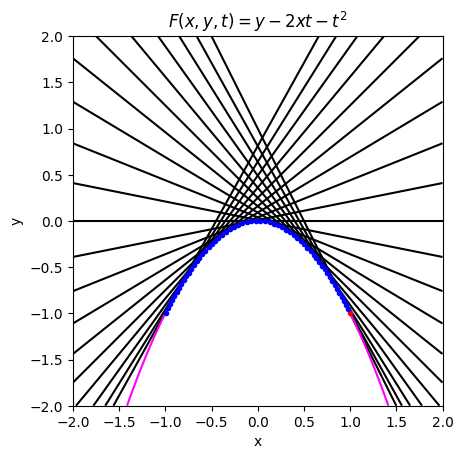


Euler's method:
Algorithm has chosen -0.955278640450005 as a root
Algorithm has chosen -0.953627252892771 as a root
Algorithm has chosen -0.908842893958390 as a root
Algorithm has chosen -0.905425282035867 as a root
Algorithm has chosen -0.860501437118771 as a root
Algorithm has chosen -0.855185130955668 as a root
Algorithm has chosen -0.810028346601903 as a root
Algorithm has chosen -0.802659541591314 as a root
Algorithm has chosen -0.757154910671102 as a root
Algorithm has chosen -0.747553998986782 as a root
Algorithm has chosen -0.701559428074462 as a root
Algorithm has chosen -0.689515825905857 as a root
Algorithm has chosen -0.642854896422347 as a root
Algorithm has chosen -0.628121630880022 as a root
Algorithm has chosen -0.580575248218382 as a root
Algorithm has chosen -0.562864805689640 as a root
Algorithm has chosen -0.514162928283178 as a root
Algorithm has chosen -0.493148410054898 as a root
Algorithm has chosen -0.442966121489505 as a root
Algorithm has chosen -0.418297690

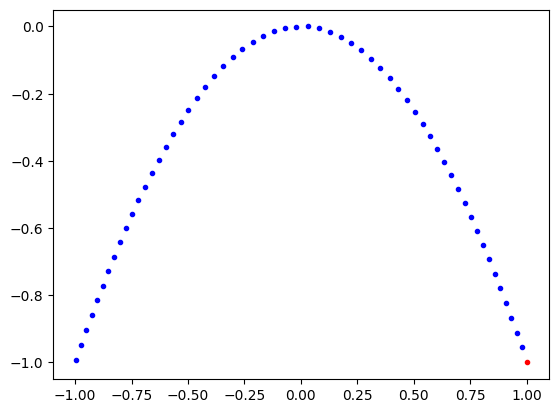


First modification of Euler's method:
Počet nulových gradientov: 0
Počet komplexných koreňov: 36
Počet iterácií: 28


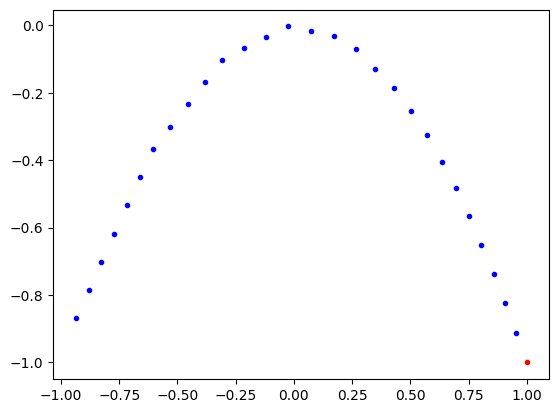


Second modification of Euler's method: 
Počet nulových gradientov: 0
Počet komplexných koreňov: 0
Počet iterácií: 30


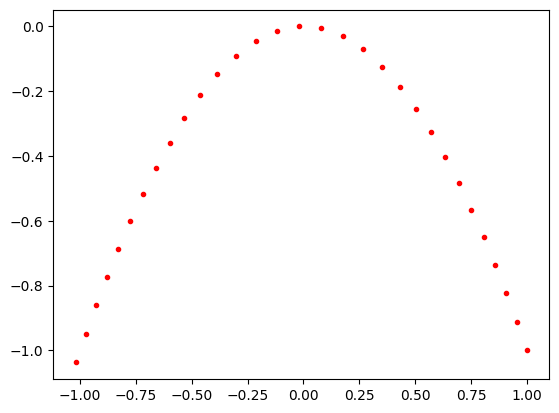


Runge-Kutta method: 
Počet nulových gradientov: 0
Počet komplexných koreňov: 101
Počet iterácií: 30


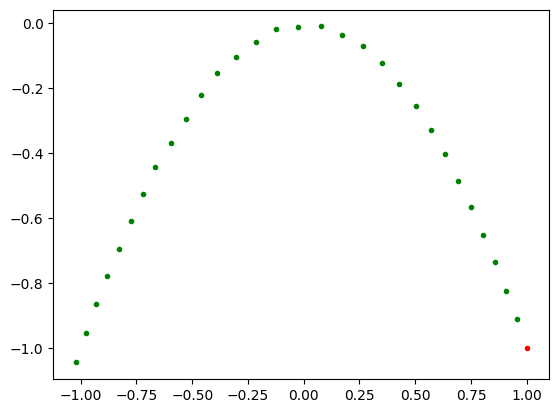

In [24]:
family_of_curves = y - 2*x*t - t**2
t_min = -1
t_max = 1
x_start = 1
y_start = -1
print(f"Starting point is ({x_start},{y_start}) and t={t_min}")

plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal')
plt.title(r'$F(x, y, t) = y - 2xt - t^2$')

axlim = 2
x_vals = np.linspace(-axlim, axlim, 100)
X, Y = np.meshgrid(x_vals, x_vals)
for t_vals in np.arange(-1,1,0.1):
    Fxy =  Y - 2*X*t_vals - t_vals**2
    plt.contour(X, Y, Fxy, levels=[0], colors='black')

Exy = Y + X**2
plt.contour(X, Y, Exy, levels=[0], colors='magenta')

euler_method(family_of_curves, x_start, y_start, t_min, t_max)
plt.show()

print("\nEuler's method:")
euler_method(family_of_curves, x_start, y_start, t_min, t_max)
plt.show()

print("\nFirst modification of Euler's method:")
first_modification_euler_method(family_of_curves, x_start, y_start, t_min, t_max, step, 'b.', eps)
plt.show()

print("\nSecond modification of Euler's method: ")
second_modification_euler_method(family_of_curves, x_start, y_start, t_min, t_max, step,'r.', eps)
plt.show()

print("\nRunge-Kutta method: ")
runge_kutta_method(family_of_curves, x_start, y_start, t_min, t_max, step,'g.', eps)
plt.show()